### Фигуры Лиссажу

https://habr.com/ru/articles/327768/

https://www.youtube.com/watch?v=bNbN9yoEOdU&t=24s

https://proproprogs.ru/modules/matplotlib-sozdaem-animaciyu-grafikov--klassy-funcanimation-i-artistanimation

https://matplotlib.org/stable/api/animation_api.html

Сами фигуры — это замкнутые траектории, прочерчиваемые точкой, совершающей одновременно два гармонических колебания в двух взаимно перпендикулярных направлениях

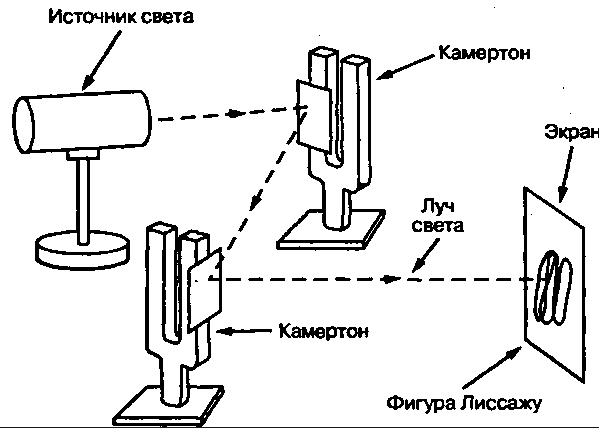

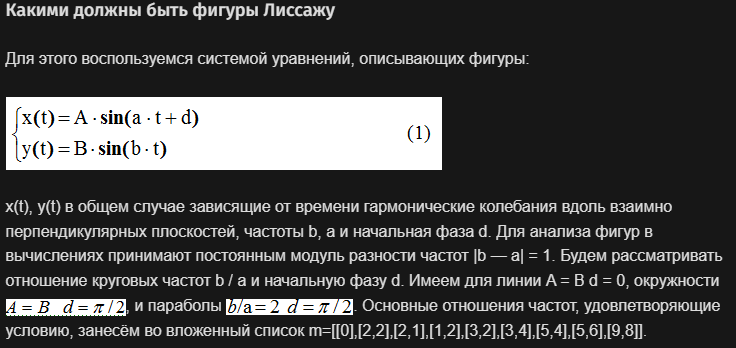

In [10]:
import numpy as np
from numpy import sin,pi
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-pastel')

C:\Users\User\AppData\Local\Temp\ipykernel_12536\4148707550.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Команды subplot(mnp) или subplot(m, n, p), где mnp - 3 цифры, производит разбивку графического окна на несколько подокон, создавая при этом новые объекты axes; значение m указывает, на сколько частей разбивается окно по горизонтали, n - по вертикали, а p - номер подокна, куда будет выводиться очередной график.

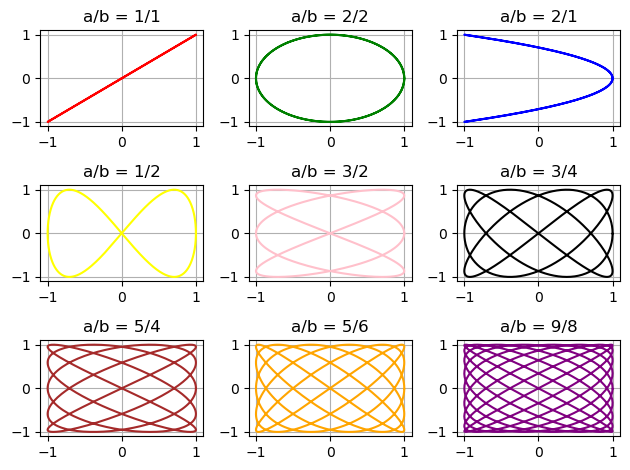

In [11]:
# Отношения круговых частот
m = [[0], [2, 2], [2, 1], [1, 2], [3, 2], [3, 4], [5, 4], [5, 6], [9, 8]]
colour = ['r','g','b','yellow','pink','black','brown','orange','purple']

# Настройка графиков
plt.figure(1)
t = np.arange(0., 2 * np.pi, 0.01)

# Обход списка с индексами
for idx, pair in enumerate(m):
    plt.subplot(3, 3, idx + 1)  # Определяем положение графика (3x3 сетка)

    # Определяем параметры
    if pair[0] == 0:  # Специальный случай для первой пары
        a = 1
        b = 1
        d = 0  # Без фазового сдвига
        c = colour[idx]
    else:
        a, b = pair
        d = 0.5 * np.pi  # Фазовый сдвиг
        c = colour[idx]

    x = np.sin(a * t + d)
    y = np.sin(b * t)

    # Построение графика
    plt.plot(x, y, c)
    plt.grid(True)
    plt.title(f"a/b = {a}/{b}")

# Показать все графики
plt.tight_layout()
plt.show()


<class 'list'>


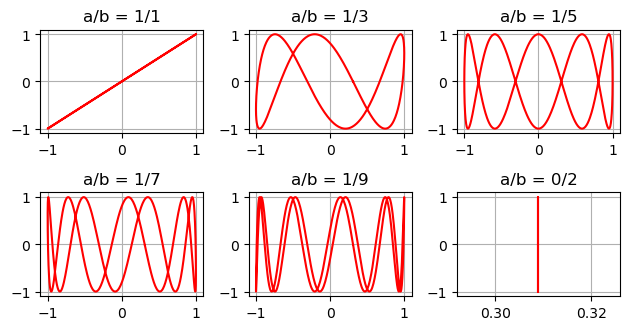

In [12]:
# Попробуем например так m=[[1,3],[1,5],[1,7],[1,9]]
# Отношения круговых частот
m = [[0,0], [1, 3], [1, 5], [1, 7], [1, 9], [0,2]]
print(type(m))

# Настройка графиков
plt.figure(1)
t = np.arange(0., 2 * np.pi, 0.01)

# Обход списка с индексами
for idx, pair in enumerate(m):
    plt.subplot(3, 3, idx + 1)  # Определяем положение графика (3x3 сетка)

    # Определяем параметры
    if idx == 0:  # Специальный случай для первой пары
        a = 1
        b = 1
        d = 0  # Без фазового сдвига
    else:
        a, b = pair
        d = 0.9 * np.pi  # Фазовый сдвиг

    x = np.sin(a * t + d)
    y = np.sin(b * t)

    # Построение графика
    plt.plot(x, y, 'r')
    plt.grid(True)
    plt.title(f"a/b = {a}/{b}")

# Показать все графики
plt.tight_layout()
plt.show()

*Если фигура незамкнутая - __следовательно она не является фигурой__ Лиссажу*

https://python-scripts.com/animations-with-matplotlib

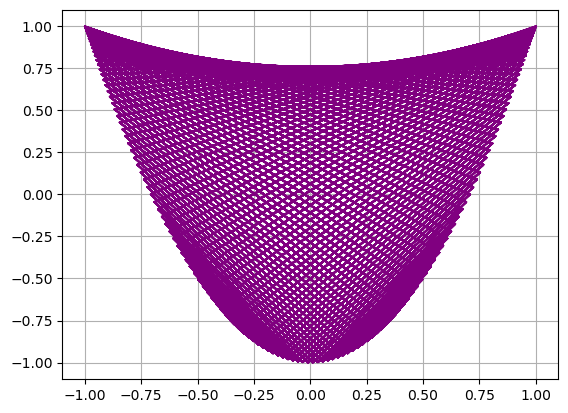

In [13]:
d = np.pi / 4
x = np.sin(1500 * t + d)
y = np.sin(3000 * t)
# Построение графика
plt.plot(x, y, c)
plt.grid(True)
plt.show()

Анимация сохранена как laser_simulation_fixed.gif


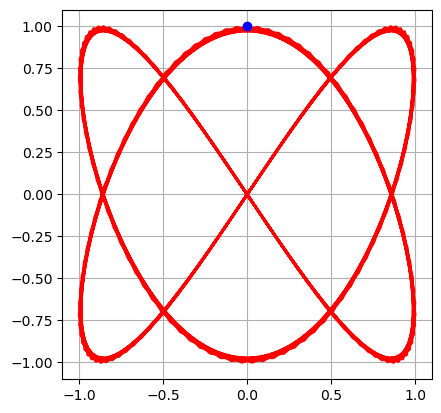

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Параметры движения зеркал (частоты и фазовый сдвиг)
frequency_x = 2000  # частота первого зеркала (по оси X)
frequency_y = 3000  # частота второго зеркала (по оси Y)
#phase_shift = np.pi / 4  # фазовый сдвиг
amplitude = 1  # амплитуда движения лазера

# Временной интервал
t = np.linspace(0, 2 * np.pi, 200)  # Уменьшено количество шагов для компактности
phase_shift = np.pi / 2

# Настройка графика
fig, ax = plt.subplots()
line, = ax.plot([], [], 'r-', lw=2)  # линия, изображающая траекторию лазера
dot, = ax.plot([], [], 'bo')  # точка, изображающая лазерный луч

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal')
ax.grid()

# Функция инициализации
def init():
    line.set_data([], [])
    dot.set_data([], [])
    return line, dot

# Функция обновления кадров
def update(frame):
    # Рассчитываем текущий момент времени
    current_t = t[:frame + 1]  # Правильный индекс включительно
    # Рассчитываем координаты
    x = amplitude * np.sin(frequency_x * current_t)
    y = amplitude * np.sin(frequency_y * current_t + phase_shift)
    
    # Обновляем данные линии и точки
    line.set_data(x, y)
    dot.set_data(x[-1], y[-1])  # Текущая точка лазера
    return line, dot

# Количество кадров в анимации
frames = len(t)

# Создание анимации
ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True, interval=20)

# Сохранение анимации в GIF
gif_path = "laser_simulation_fixed.gif"  # Название файла
writer = PillowWriter(fps=60)  # 30 кадров в секунду
ani.save(gif_path, writer=writer)

print(f"Анимация сохранена как {gif_path}")

# Показать анимацию
plt.show()


### Как узнать фазу?

В контексте вашей установки с зеркалами и двигателями фаза — это относительный сдвиг во времени между движением двух зеркал (или частотами их колебаний). Если представить лазерный луч, отражающийся от зеркал, то разная фаза приводит к изменению начальной точки колебаний одного зеркала относительно другого.

_Для вращения фигуры Лиссажу можно добавлять небольшую динамическую фазовую компоненту, которая изменяется с каждым кадром. Это создаёт эффект поворота и изменения фигуры. Такой подход имитирует изменение начальной фазы двигателей или лёгкую рассинхронизацию._

#### Вот пример кода, который добавляет динамическое вращение и изменение фазы:

Анимация сохранена как rotating_lissajous.gif


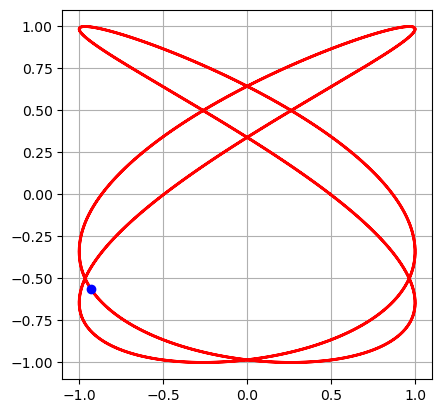

In [15]:
# Параметры движения зеркал (частоты и начальная фаза)
frequency_x = 3000  # частота первого зеркала (по оси X)
frequency_y = 2000  # частота второго зеркала (по оси Y)
initial_phase = np.pi / 2  # начальная фаза
amplitude = 1  # амплитуда движения лазера

# Временной интервал
t = np.linspace(0, 2 * np.pi, 500)  # Шаги времени для анимации

# Настройка графика
fig, ax = plt.subplots()
line, = ax.plot([], [], 'r-', lw=2)  # линия, изображающая траекторию лазера
dot, = ax.plot([], [], 'bo')  # точка, изображающая лазерный луч

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal')
ax.grid()

# Функция инициализации
def init():
    line.set_data([], [])
    dot.set_data([], [])
    return line, dot

# Функция обновления кадров
def update(frame):
    # Текущая фазовая добавка для вращения
    dynamic_phase = initial_phase + frame * 0.1  # Постепенное изменение фазы
    
    # Рассчитываем координаты с учётом изменяющейся фазы
    x = amplitude * np.sin(frequency_x * t + dynamic_phase)
    y = amplitude * np.sin(frequency_y * t)
    
    # Обновляем данные линии и точки
    line.set_data(x, y)
    dot.set_data(x[frame % len(t)], y[frame % len(t)])  # текущая точка лазера
    return line, dot

# Количество кадров в анимации
frames = 200  # Количество кадров для GIF

# Создание анимации
ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True, interval=50)

# Сохранение анимации в GIF
gif_path = "rotating_lissajous.gif"
writer = PillowWriter(fps=30)
ani.save(gif_path, writer=writer)

print(f"Анимация сохранена как {gif_path}")

# Показать анимацию
plt.show()


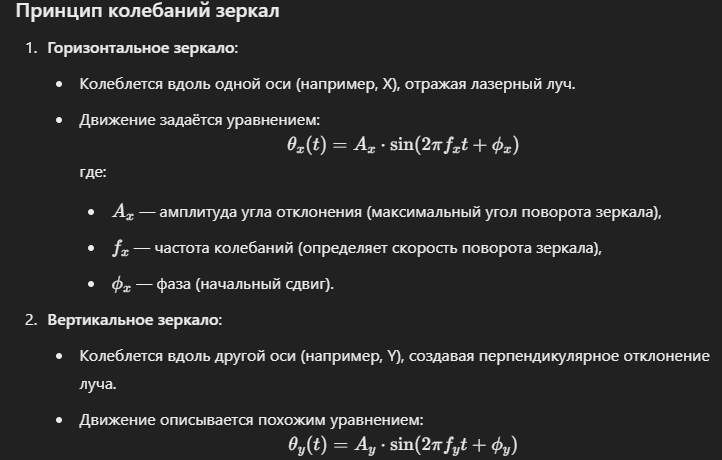

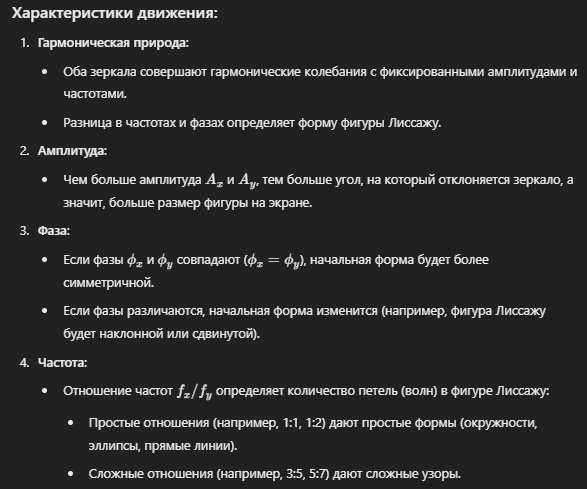

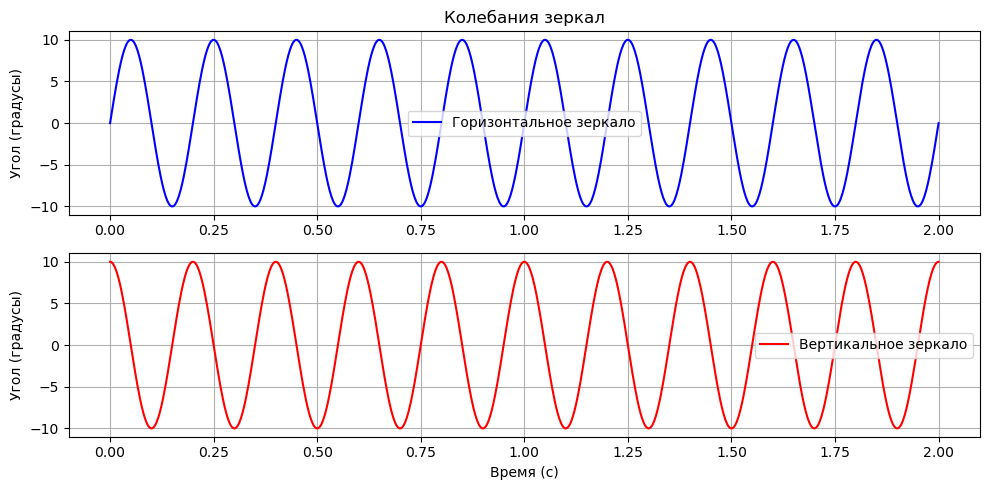

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры движения зеркал
f_x = 5  # частота колебаний горизонтального зеркала
f_y = 5  # частота колебаний вертикального зеркала
phi_x = 0  # фаза горизонтального зеркала
phi_y = np.pi / 2  # фаза вертикального зеркала
A_x = A_y = 10  # амплитуда колебаний (в градусах)

# Временной интервал
t = np.linspace(0, 2, 1000)  # 2 секунды

# Углы отклонения зеркал
theta_x = A_x * np.sin(2 * np.pi * f_x * t + phi_x)
theta_y = A_y * np.sin(2 * np.pi * f_y * t + phi_y)

# Построение графиков
plt.figure(figsize=(10, 5))

# Горизонтальное зеркало
plt.subplot(2, 1, 1)
plt.plot(t, theta_x, label="Горизонтальное зеркало", color="blue")
plt.ylabel("Угол (градусы)")
plt.title("Колебания зеркал")
plt.legend()
plt.grid()

# Вертикальное зеркало
plt.subplot(2, 1, 2)
plt.plot(t, theta_y, label="Вертикальное зеркало", color="red")
plt.xlabel("Время (с)")
plt.ylabel("Угол (градусы)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Почему зеркала будут колебаться гармонически? Ведь если я закреплю их на клей под определённым углом на вал двигателя, а луч направлю на одну точку вращающегося зеркала, то по идее он будет отклоняться всегда на один градус. Если я не прав, объясни мне.

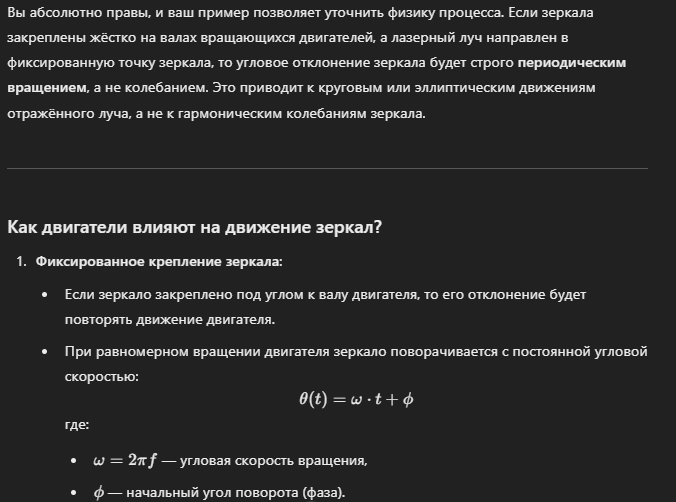

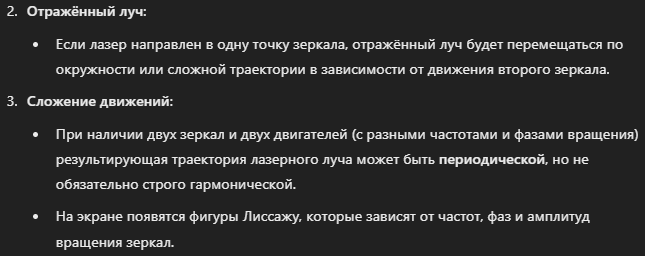

Однако в вашей системе, где используются двигатели с постоянным вращением, движение отражённого луча будет определяться угловой скоростью двигателей, а не гармоническими колебаниями.

### 3d Моделирование

1. Статическая фаза

Анимация сохранена как 3d.gif


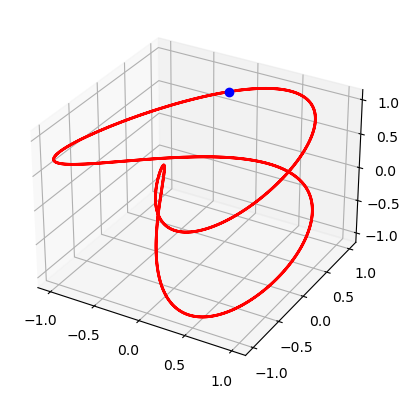

In [17]:
# Параметры
frequency_x = 2  # частота движения по X
frequency_y = 3  # частота движения по Y
frequency_z = 1  # частота движения по Z
phase_shift_x = 0
phase_shift_y = np.pi / 4
phase_shift_z = np.pi / 2
amplitude = 1  # амплитуда движения
t = np.linspace(0, 4 * np.pi, 500)  # временной интервал

# Траектория лазера
x = amplitude * np.sin(frequency_x * t + phase_shift_x)
y = amplitude * np.sin(frequency_y * t + phase_shift_y)
z = amplitude * np.sin(frequency_z * t + phase_shift_z)

# Настройка графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])

line, = ax.plot([], [], [], 'r-', lw=2)
dot, = ax.plot([], [], [], 'bo')

# Функция инициализации
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    dot.set_data([], [])
    dot.set_3d_properties([])
    return line, dot

# Функция обновления
def update(frame):
    line.set_data(x[:frame], y[:frame])
    line.set_3d_properties(z[:frame])
    dot.set_data(x[frame-1:frame], y[frame-1:frame])
    dot.set_3d_properties(z[frame-1:frame])
    return line, dot

# Анимация
ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=1)

# Сохранение анимации в GIF
gif_path = "3d.gif"
writer = PillowWriter(fps=60)
ani.save(gif_path, writer=writer)

print(f"Анимация сохранена как {gif_path}")

# Показать анимацию
plt.show()


2. Динамическая фаза

Анимация сохранена как 3d_dynamic.gif


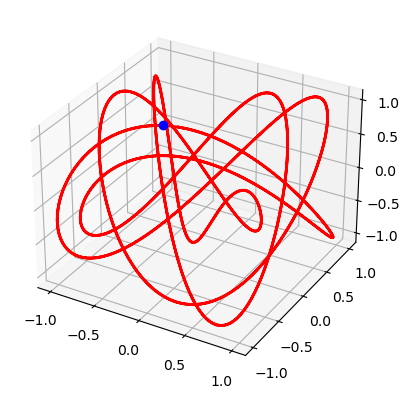

In [18]:
# Параметры
frequency_x = 4  # частота движения по X
frequency_y = 5  # частота движения по Y
frequency_z = 7  # частота движения по Z
amplitude = 1  # амплитуда движения

phase_speed = 0.05  # скорость изменения фазы
t = np.linspace(0, 4 * np.pi, 500)  # временной интервал

# Настройка графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])
ax.grid()

line, = ax.plot([], [], [], 'r-', lw=2)  # Линия траектории
dot, = ax.plot([], [], [], 'bo')  # Точка лазера

# Функция инициализации
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    dot.set_data([], [])
    dot.set_3d_properties([])
    return line, dot

# Функция обновления
def update(frame):
    # Динамическая фаза
    phase_shift_x = phase_speed * frame
    phase_shift_y = phase_speed * frame / 2
    phase_shift_z = phase_speed * frame / 3

    # Траектория лазера
    x = amplitude * np.sin(frequency_x * t[:frame] + phase_shift_x)
    y = amplitude * np.sin(frequency_y * t[:frame] + phase_shift_y)
    z = amplitude * np.sin(frequency_z * t[:frame] + phase_shift_z)

    # Обновление графика
    line.set_data(x, y)
    line.set_3d_properties(z)
    dot.set_data(x[-1:], y[-1:])
    dot.set_3d_properties(z[-1:])
    return line, dot

# Анимация
ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=1)

gif_path = "3d_dynamic.gif"
writer = PillowWriter(fps=200)
ani.save(gif_path, writer=writer)

print(f"Анимация сохранена как {gif_path}")

# Показать анимацию
plt.show()
